<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 3: Logistic Regression</h3>
<h3 align="center">10/04/2018</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from lab3_functions import get_data
from lab3_functions import plot_university_data
from lab3_functions import add_ones
from lab3_functions import standardize
from lab3_functions import split_data
from lab3_functions import plot_university_data_with_line

### Load and Split Dataset

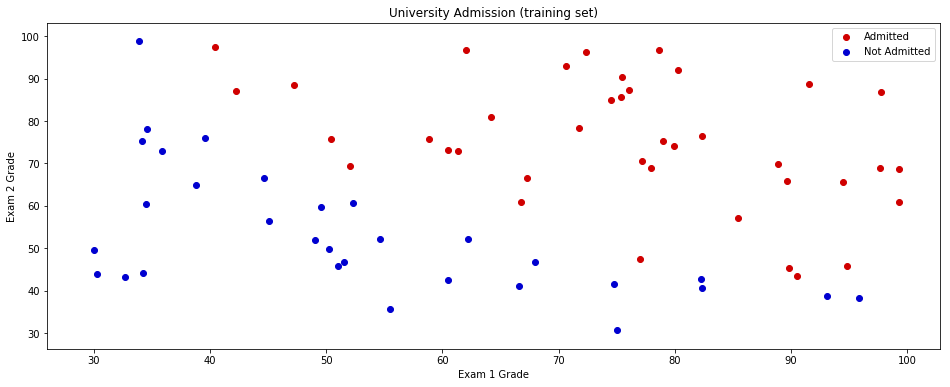

In [2]:
#dataset from Andrew NG course
features_, labels_ = get_data("university_admission_data.txt")

train_features_, train_labels, test_features_, test_labels = split_data(features_, labels_, 0.3)

plot_university_data(train_features_, train_labels)

### Preprocess Dataset

In [3]:
print(f"Sample of features : \n{train_features_[:3]}\n")

#standardize features (substract mean and divide by standard deviation)
train_features, train_mean, train_std = standardize(train_features_)
test_features = standardize(test_features_, train_mean, train_std)
print(f"Sample of features after standardization: \n{train_features[:3]}\n")

#augment features (add ones for the intercept)
train_features = add_ones(train_features)
test_features = add_ones(test_features)
print(f"Sample of features after adding ones: \n{train_features[:3]}")

Sample of features : 
[[32.72283304 43.30717306]
 [58.84095622 75.85844831]
 [35.84740877 72.90219803]]

Sample of features after standardization: 
[[-1.60803674 -1.19972497]
 [-0.32629879  0.56820061]
 [-1.45469926  0.40764068]]

Sample of features after adding ones: 
[[ 1.         -1.60803674 -1.19972497]
 [ 1.         -0.32629879  0.56820061]
 [ 1.         -1.45469926  0.40764068]]


## <font color="#00cccc"> Logistic Regression <font/>
### Logistic Function
Linear Function:

$$z = x^T w$$

Logistic Sigmoid:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$

Apply Logistic Sigmoid to the Linear Function

$$y = \sigma(x^T w) = \frac{1}{1+e^{-x^T w}}$$

<b>Sigmoid Visualization:</b> https://www.desmos.com/calculator/web9fdnqft

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that calculates the sigmoid <font/>

In [4]:
## Define sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
## Test your function, result should be [0 0.25 0.5 0.75 1]
x = np.array([-100,-1.1,0,1.1,100])
print(np.round(sigmoid(x),2))

[0.   0.25 0.5  0.75 1.  ]


### Logistic Loss
let t = training labels, y = our estimate

Loss Function:

$$J(w) = -\frac{1}{N}\sum_{i=1}^{N} t_i ln(y_i) + (1-t_i) ln(1-y_i) $$

where

$$y_i = \sigma (x_i^T w) = \frac{1}{1+e^{-x_i^T w}}$$

Derivative of Loss w.r.t weights ($w$):

$$\nabla_w J(w) = \frac{1}{N}\sum_{i=1}^N (y_i - t_i)x_i$$

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that calculates the loss <font/>

In [6]:
## Define loss function (use the sigmoid function you defined above)
## bonus: do it using matrix multiplications with no loops or summations
def logistic_loss(w, X, t):
    loss = 0
    for x_i, t_i in zip(X,t):
        y_i = sigmoid(np.dot(x_i.T,w))
        loss -= (t_i*np.log(y_i) + (1-t_i)*np.log(1-y_i))
    N = X.shape[0]
    loss /= N
    return loss

## same function using matrix multiplications
def logistic_loss(w, X, t):
    y = sigmoid(np.dot(train_features,w))
    loss = -np.dot(train_labels,np.log(y)) - np.dot(1-train_labels,np.log(1-y))
    N = X.shape[0]
    loss /= N
    return loss

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that calculates the gradient <font/>

In [23]:
## Define gradient of loss function (use the sigmoid function you defined above)
## bonus: do it using matrix multiplications with no loops or summations
def logistic_gradient(w, X, t):
    gradient = 0
    for x_i, t_i in zip(X,t):
        y_i = sigmoid(np.dot(x_i.T,w))
        gradient += (y_i - t_i) * x_i
    N = X.shape[0]
    gradient /= N
    return gradient

## same function using matrix multiplications
def logistic_gradient(w, X, t):
    y = sigmoid(np.dot(train_features,w))
    gradient = np.dot((y-t).T,X)
    N = X.shape[0]
    gradient /= N
    return gradient

### Classification using Logistic Regression
Logistic Regression classifies as positive when $P(C=positive\ |\ x_i) > 0.5$, that happens when $y_i > 0.5$, where
$$y_i = \sigma (x_i^T w) = \frac{1}{1+e^{-x_i^T w}}$$

The overall accuracy of the model can be estimated as follow:
$$accuracy = \frac{number\ of\ correct\ predictions}{total\ number\ of\ predictions} * 100\%$$

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that classifies the input <font/>

In [24]:
## Define a function that classifies the input
def logistic_classify(w, X):
    y = sigmoid(np.dot(X,w))
    predictions = y > 0.5
    return predictions

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that calculates the accuracy <font/>

In [25]:
## Define a function that calculates the accuracy
def logistic_accuracy(w, X, t):
    predictions = logistic_classify(w, X)
    correct_predictions = np.sum(predictions == t)
    accuracy = correct_predictions / len(predictions) * 100
    return accuracy

### Train

#### Initialize Parameters

In [26]:
#Initialize parameters and hyperparameters
w_old = np.random.uniform(0,0.2,train_features.shape[1])
w_new = w_old

loss_old = logistic_loss(w_old, train_features, train_labels)
loss_new = 0
delta_loss = -10000 #difference between new loss and old loss

learning_rate = 0.5

iteration = 0
max_iterations = 30 #stop after how many iterations if the solution didn't converge

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Train the logistic regression using batch gradient descent. Use the functions that you defined above <font/>

Iteration no. 1, Training Accuracy = 90.0%, Training Loss = 0.57, Change in Loss = -0.062


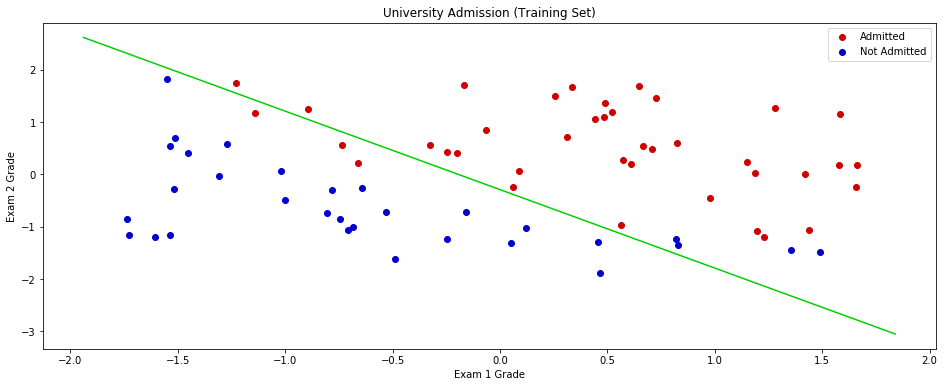

Iteration no. 2, Training Accuracy = 90.0%, Training Loss = 0.52, Change in Loss = -0.049


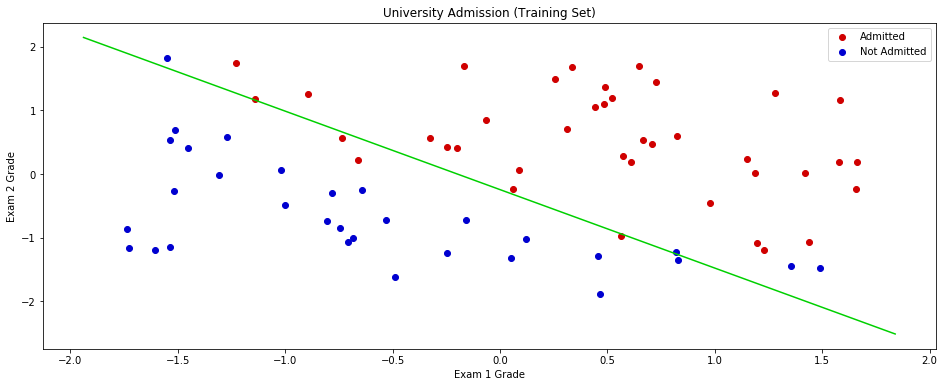

Iteration no. 3, Training Accuracy = 91.4%, Training Loss = 0.48, Change in Loss = -0.039


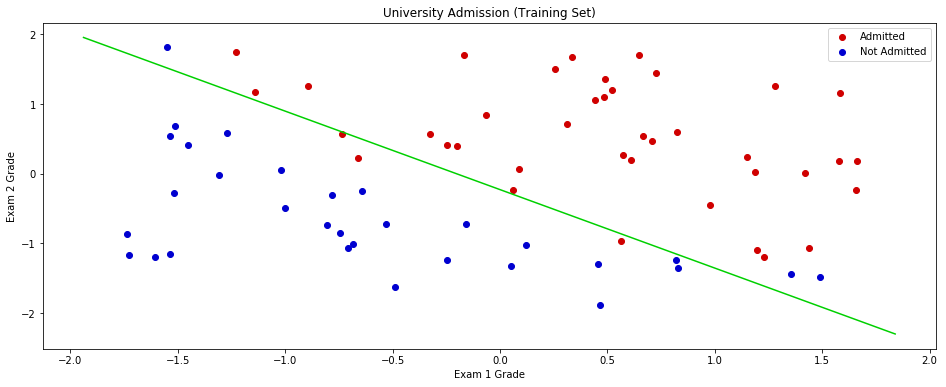

Iteration no. 4, Training Accuracy = 91.4%, Training Loss = 0.45, Change in Loss = -0.031


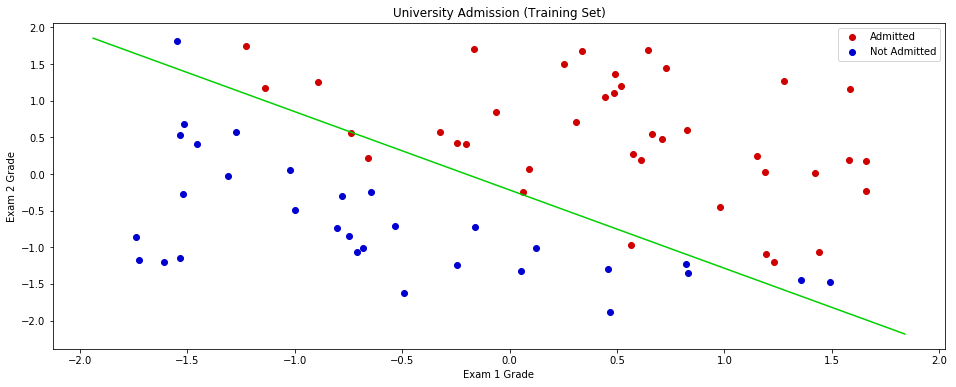

Iteration no. 5, Training Accuracy = 92.9%, Training Loss = 0.42, Change in Loss = -0.026


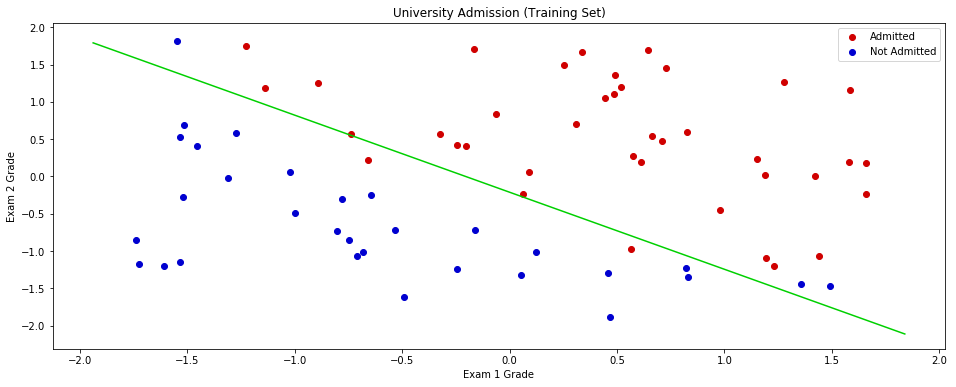

Iteration no. 6, Training Accuracy = 92.9%, Training Loss = 0.40, Change in Loss = -0.021


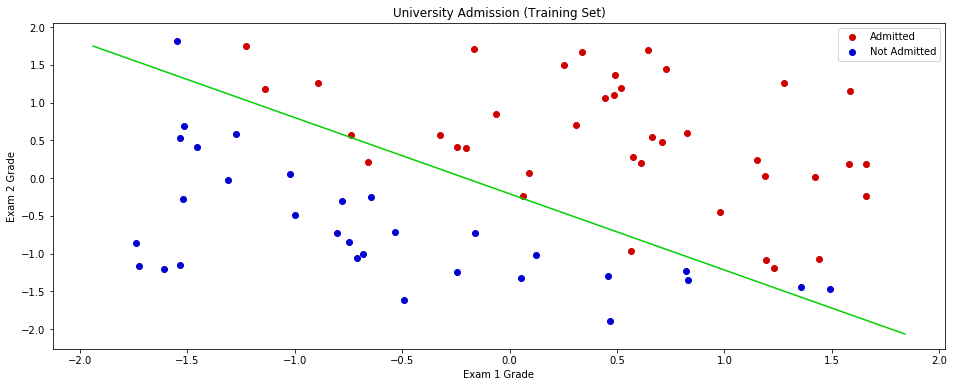

Iteration no. 7, Training Accuracy = 92.9%, Training Loss = 0.38, Change in Loss = -0.018


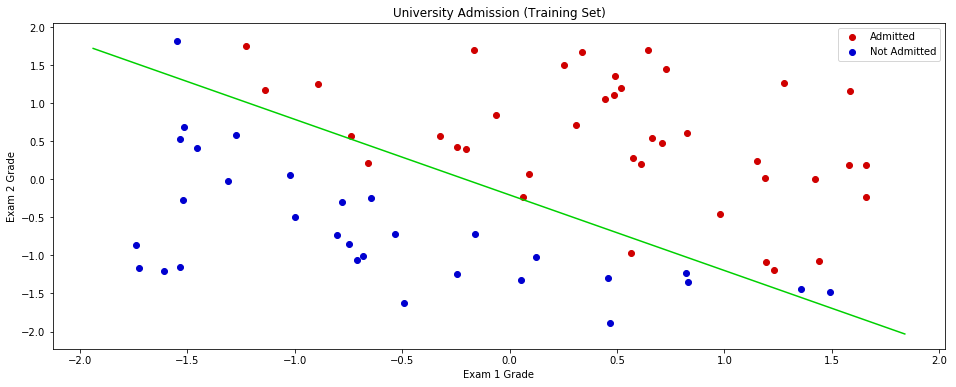

Iteration no. 8, Training Accuracy = 92.9%, Training Loss = 0.37, Change in Loss = -0.015


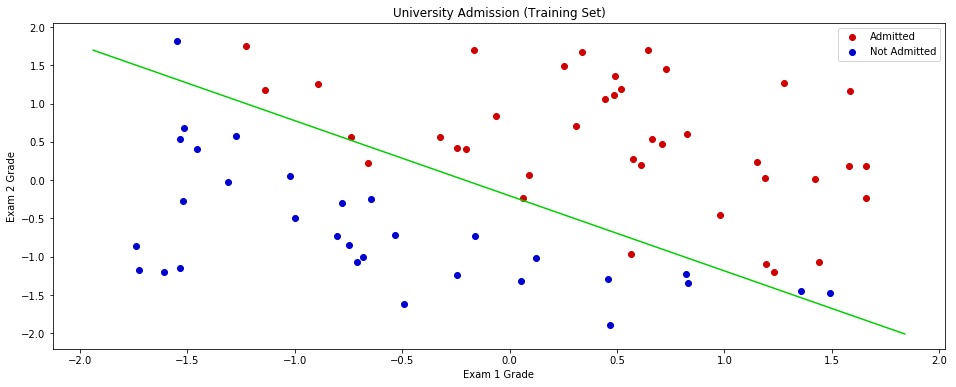

Iteration no. 9, Training Accuracy = 92.9%, Training Loss = 0.36, Change in Loss = -0.013


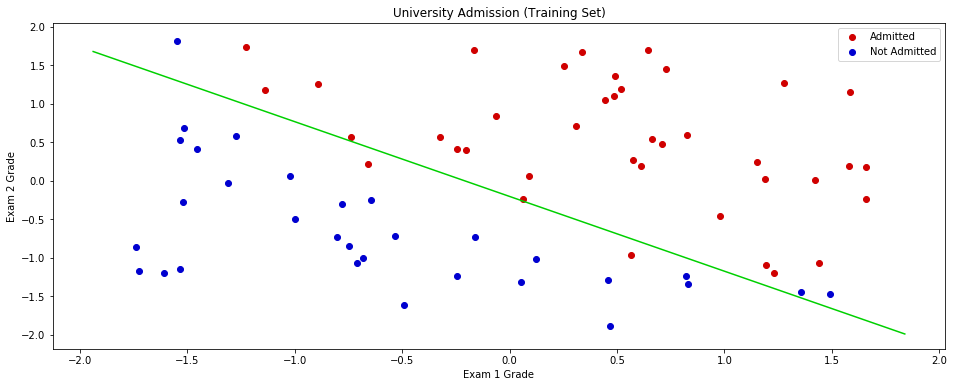

Iteration no. 10, Training Accuracy = 92.9%, Training Loss = 0.34, Change in Loss = -0.012


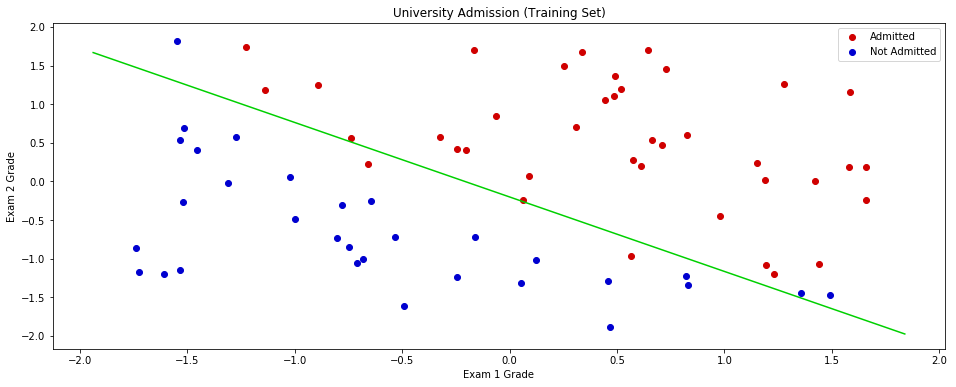

Iteration no. 11, Training Accuracy = 92.9%, Training Loss = 0.33, Change in Loss = -0.010


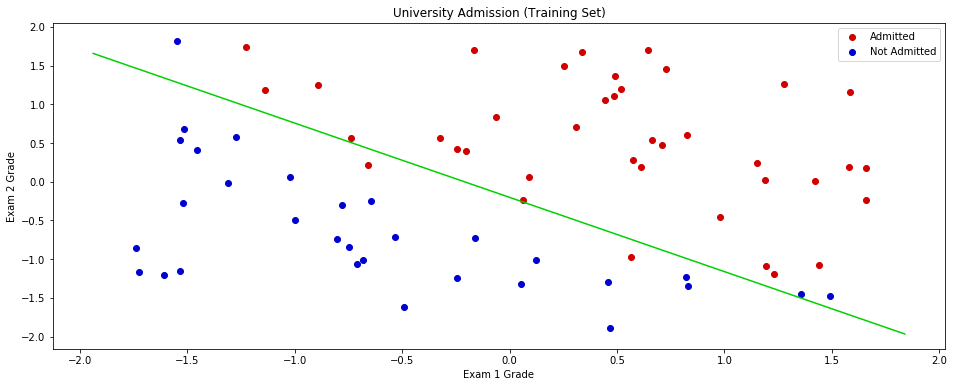

Iteration no. 12, Training Accuracy = 92.9%, Training Loss = 0.32, Change in Loss = -0.009


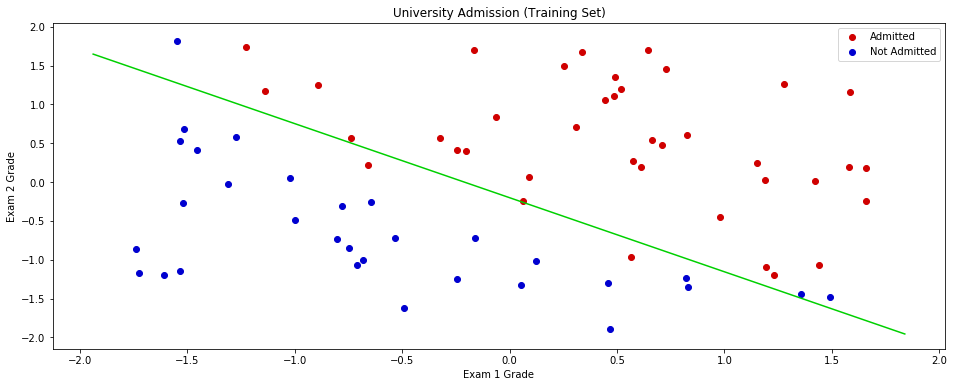

*********************
*********************
*********************
Test Accuracy = 76.7% Test Loss = 0.76


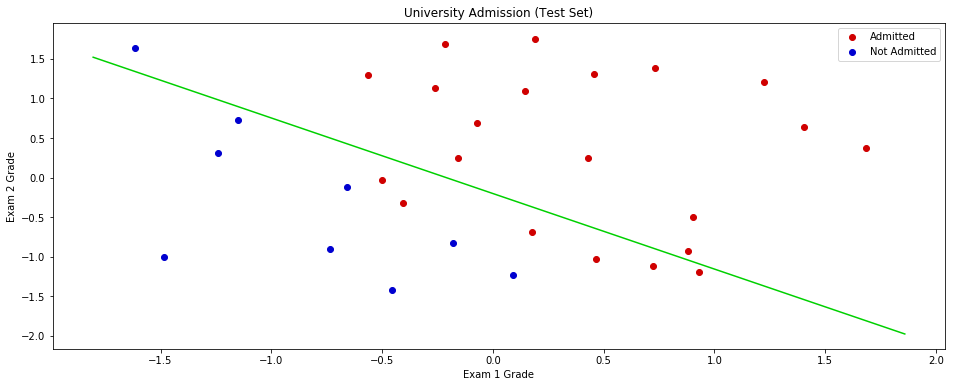

In [27]:
while (delta_loss < -0.01 and iteration < max_iterations): #stop condition
    gradient = logistic_gradient(w_old, train_features, train_labels)
    w_new = w_old - learning_rate * gradient
    w_old = w_new
    
    loss_new = logistic_loss(w_new, train_features, train_labels)
    delta_loss = loss_new - loss_old
    loss_old = loss_new
    
    train_accuracy = logistic_accuracy(w_new, train_features, train_labels)
    
    iteration += 1
    
    print(f"Iteration no. {iteration}, Training Accuracy = {train_accuracy:.1f}%, Training Loss = {loss_new:.2f}, Change in Loss = {delta_loss:.3f}")
    
    plot_university_data_with_line(w_new, train_features[:,1:], train_labels, "Training Set")
    
    
test_loss = logistic_loss(w_new, test_features, test_labels)
test_accuracy = logistic_accuracy(w_new, test_features, test_labels)
print(f"*********************\n*********************\n*********************\nTest Accuracy = {test_accuracy:.1f}% Test Loss = {test_loss:.2f}")
plot_university_data_with_line(w_new, test_features[:,1:], test_labels, "Test Set")

## <font color="#987654"> Perceptron <font/>
Perceptron Function: (note that we use here +1 and -1 and not +1 and 0 as in logistic regression)

$$f(a) = +1\ if\ a \geqslant 0$$
$$f(a) = -1\ if\ a < 0$$
where: (remember that x includes a 1 for the bias term)
$$ a = x^T w$$ 

Perceptron Criterion (Loss):
$$E_p(w) = -\sum_{i=1}^N x_i^T w t_i$$ where $t_i$ is the ith true label

Perceptron update Step using Stochastic Gradient Descent (On Mistake Only):
$$w^{(\tau+1)} = w^{(\tau)} + \eta x_i t_i$$

<img src="https://raw.githubusercontent.com/miku/nntour/master/gifs/perceptron-pla-14-steps.gif?token=AADRybgfQ0WmVaU-NZbgwHdoFhCN-XdVks5YMzirwA%3D%3D">
source: https://github.com/miku/nntour

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that classifies the input <font/>

In [12]:
## Define a function that classifies the input
def perceptron_classify(w, X):
    y = np.dot(X,w)
    predictions = y >= 0
    predictions = predictions.astype(np.int16)
    predictions[predictions == 0] = -1
    return predictions

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Define a function that calculates the accuracy <font/>

In [13]:
## Define a function that calculates the accuracy
def perceptron_accuracy(w, X, t):
    predictions = perceptron_classify(w, X)
    correct_predictions = np.sum(predictions == t)
    accuracy = correct_predictions / len(predictions) * 100
    return accuracy

### Train

#### Modify labels for perceptron to be 1 or -1 instead of 1 or 0

In [14]:
train_labels_perceptron = train_labels.copy()
train_labels_perceptron[train_labels_perceptron == 0] = -1

test_labels_perceptron = test_labels.copy()
test_labels_perceptron[test_labels_perceptron == 0] = -1

#### Initialize Parameters

In [15]:
#Initialize parameters and hyperparameters
w_old = np.random.uniform(0,0.2,train_features.shape[1])
w_new = w_old

train_accuracy= perceptron_accuracy(w_old, train_features, train_labels)

learning_rate = 0.01

iteration = 0
max_iterations = 100 #stop after how many iterations if the solution didn't converge

train_size = train_features.shape[0]

#### <font color="#ef0000"> Write your code here: <font/>
<font color="#ef0000"> Train the logistic regression using batch gradient descent. Use the functions that you defined above <font/>

Iteration no. 3, Training Accuracy = 75.7%


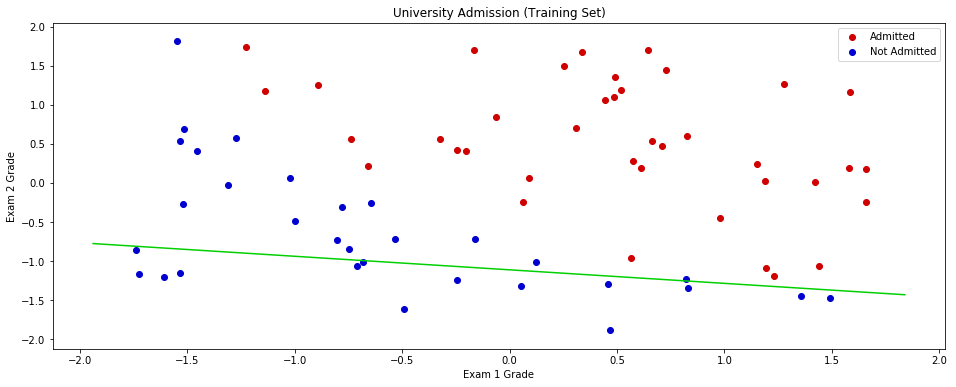

Iteration no. 8, Training Accuracy = 70.0%


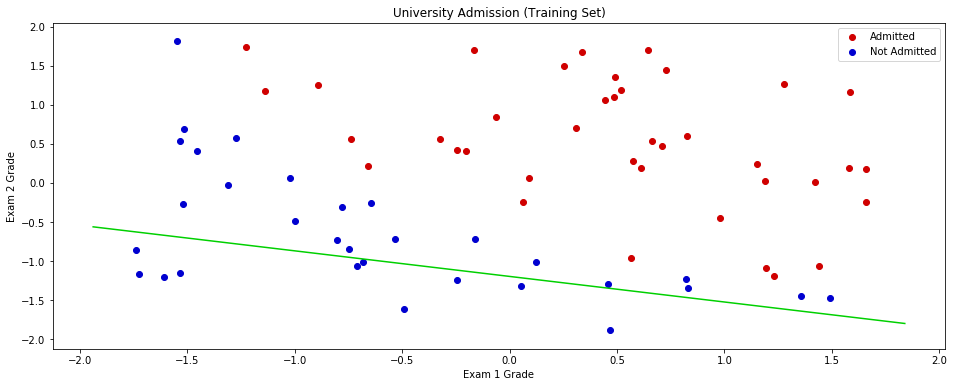

Iteration no. 15, Training Accuracy = 72.9%


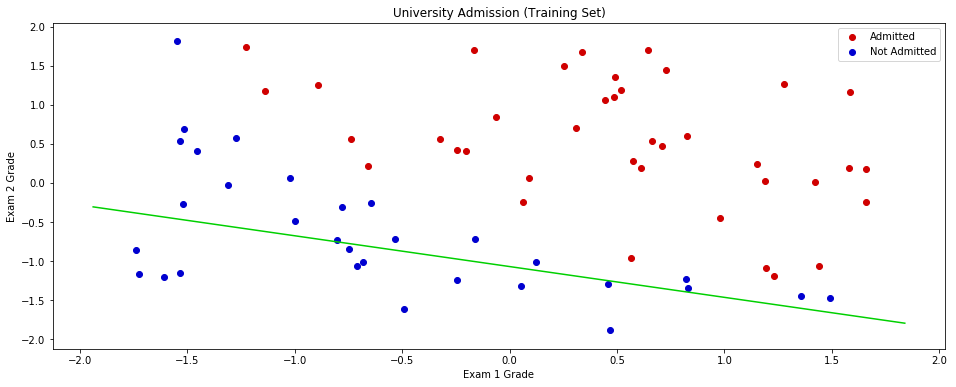

Iteration no. 23, Training Accuracy = 77.1%


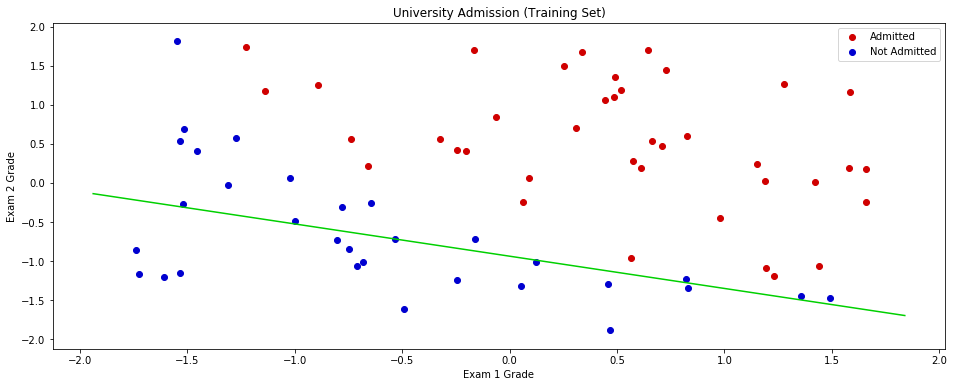

Iteration no. 31, Training Accuracy = 80.0%


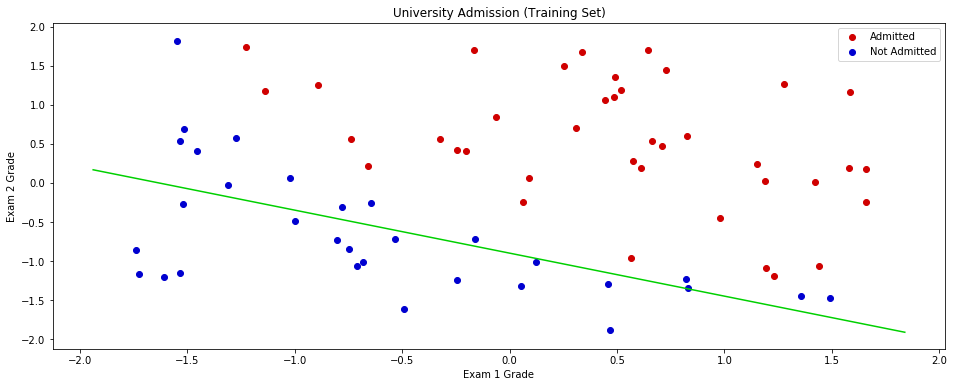

Iteration no. 37, Training Accuracy = 82.9%


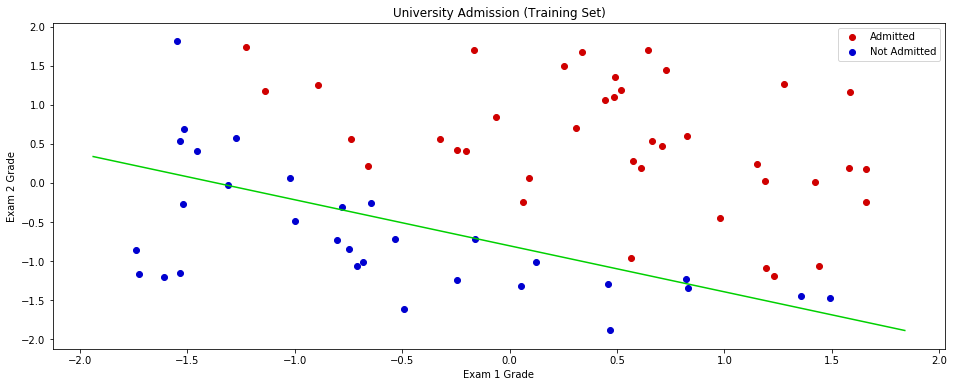

Iteration no. 50, Training Accuracy = 85.7%


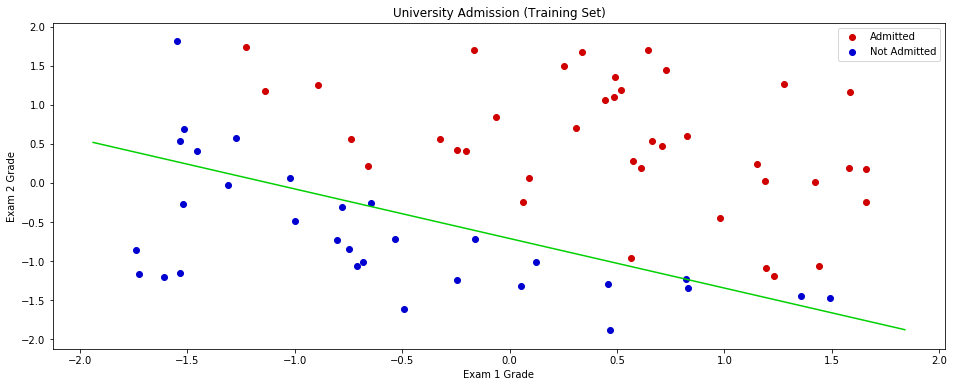

Iteration no. 53, Training Accuracy = 90.0%


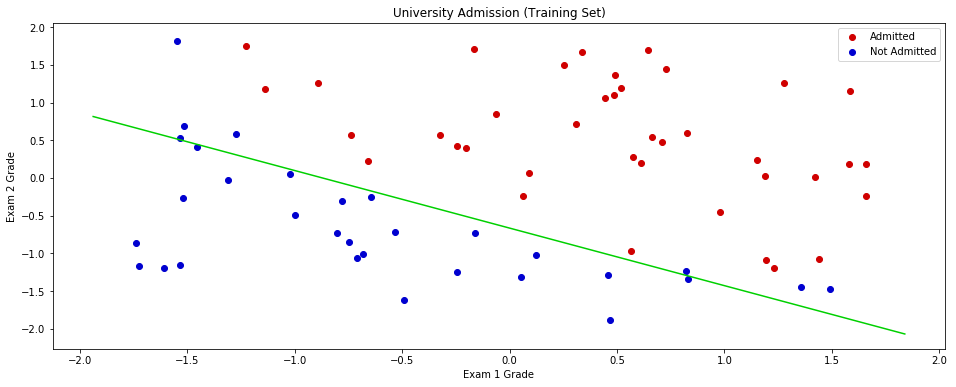

Iteration no. 69, Training Accuracy = 90.0%


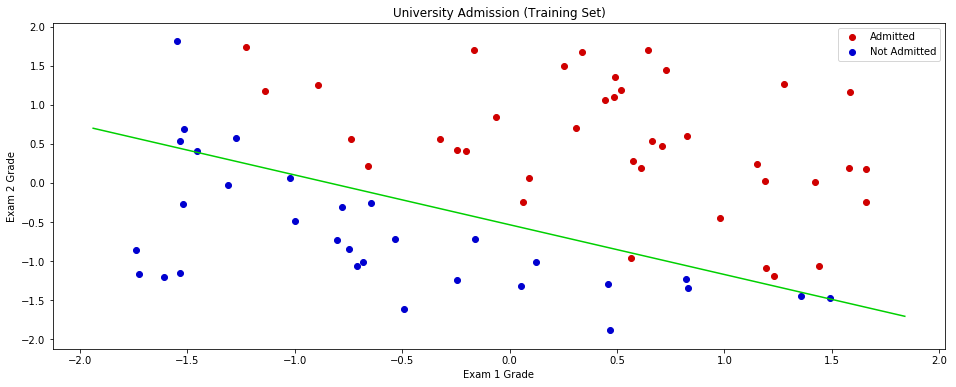

Iteration no. 73, Training Accuracy = 91.4%


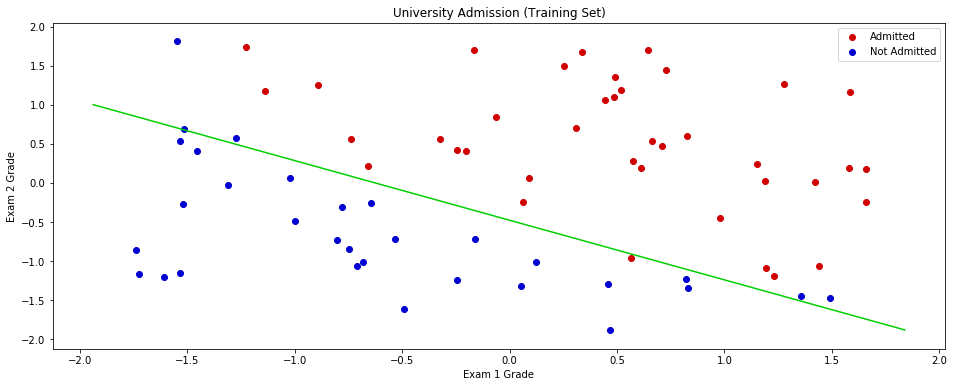

Iteration no. 78, Training Accuracy = 94.3%


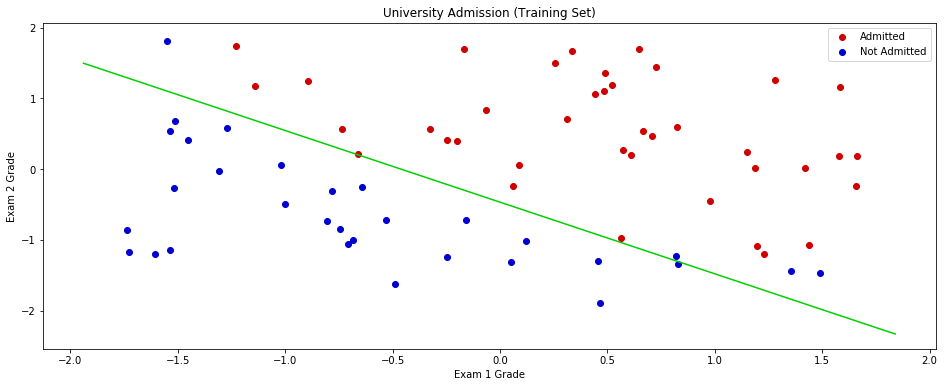

*********************
*********************
*********************
Test Accuracy = 80.0%


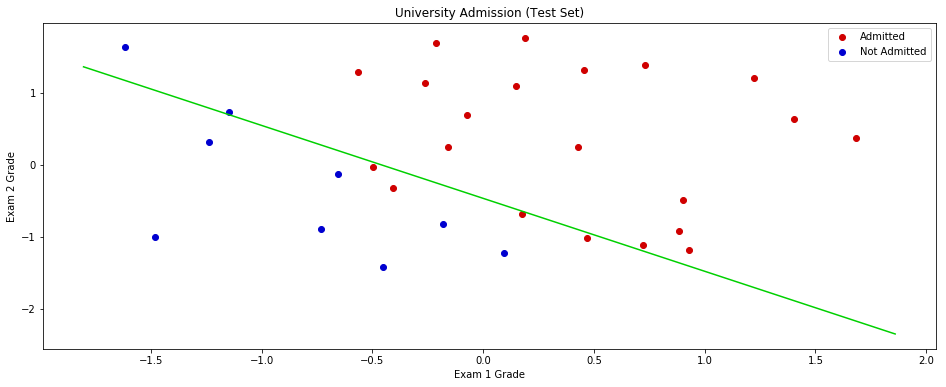

In [16]:
shuffled_order = np.random.permutation(train_size)
while (train_accuracy < 100 and iteration < max_iterations): #stop condition
    x_i = train_features[iteration%train_size,:]
    t_i = train_labels_perceptron[iteration%train_size]
    prediction = np.dot(x_i.T, w_old)
    if prediction >= 0:
        prediction = 1
    else:
        prediction = -1
        
    if (prediction != t_i):
        w_new = w_old + learning_rate * x_i * t_i
        w_old = w_new
        
        train_accuracy = perceptron_accuracy(w_new, train_features, train_labels_perceptron)
    
        iteration += 1
    
        print(f"Iteration no. {iteration}, Training Accuracy = {train_accuracy:.1f}%")
    
        plot_university_data_with_line(w_new, train_features[:,1:], train_labels, "Training Set")
    
    iteration += 1
    
    
test_accuracy = perceptron_accuracy(w_new, test_features, test_labels_perceptron)
print(f"*********************\n*********************\n*********************\nTest Accuracy = {test_accuracy:.1f}%")
plot_university_data_with_line(w_new, test_features[:,1:], test_labels, "Test Set")

## <font color = "#af00af"> Questions to think about:<font/>


### <font color = "#af00af">1) Why is Logistic Regression better than Linear Regression when dealing with outliers?<font/>
<img src="Lab3_outliers.png">
<h5 align="center">Bishop 4.4<h5/>

### <font color = "#af00af">2) How can we deal with this data?<font/>

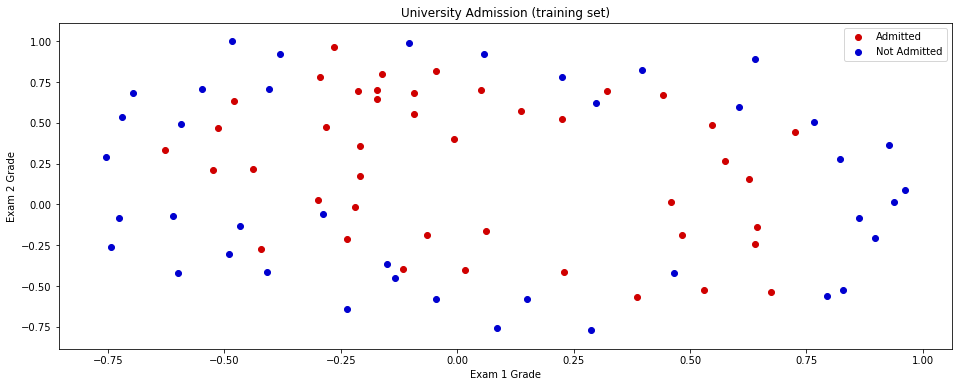

In [17]:
#dataset from Andrew NG course
features__, labels__ = get_data("lab3data2.txt")

train_features__, train_labels__, test_features__, test_labels__ = split_data(features__, labels__, 0.3)

plot_university_data(train_features__, train_labels__)

### <font color = "#af00af">3) What if we want to use logistic regression with more than two classes?<font/>

### <font color = "#af00af">4) When should we use recall, precision, or F1 score instead of accuracy?<font/>